## Cleaning the data k

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B277-1178

 Directory of C:\Users\Netta\Downloads\ds19-master\ds19-master

06/20/2019  11:22 AM    <DIR>          .
06/20/2019  11:22 AM    <DIR>          ..
06/20/2019  10:39 AM    <DIR>          .ipynb_checkpoints
06/20/2019  10:04 AM           212,986 06.17.19_Kaggle Project II.ipynb
06/20/2019  10:04 AM           225,342 06.19.19_Kaggle Combined Code_Attempt 1.ipynb
06/20/2019  11:22 AM            90,788 Cleaning and Predicting k.ipynb
06/20/2019  10:04 AM            16,874 Cleaning the Data k.ipynb
06/17/2019  10:42 AM             3,258 gender_submission.csv
06/20/2019  10:04 AM            14,115 Graphviz and Pydotplus installation.ipynb
06/20/2019  10:41 AM           106,056 Project 2 with 2nd Clean.ipynb
06/20/2019  10:04 AM           113,320 Project 2(kas).ipynb
06/20/2019  10:04 AM           123,949 Project 2.ipynb
06/20/2019  10:04 AM                46 README.md
06/20/2019  10:04 AM             3,258 submission_1.csv
0

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
tr4=pd.DataFrame(train)

In [5]:
data=[tr4]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
tr4 = tr4.drop(['Name'], axis=1)

In [6]:
tr4pc=tr4[tr4['Parch']<=2] #tr4pc is possible child
tr4pc=tr4pc[tr4pc['Parch']>0] #trying no parents when # is in front 
tr4pc=tr4pc[tr4pc['SibSp']>1] 
tr4pa=pd.concat([tr4,tr4pc,tr4pc]).drop_duplicates(keep=False)
tr4mast=tr4pa[tr4pa['Title']==4]
miss=tr4pa[tr4pa['Title']==2]
ymiss=miss[miss['Parch']>0]
tr4LCh=pd.concat([tr4pc,tr4mast,ymiss]).drop_duplicates(keep='first')#likely child
tr4LA=pd.concat([tr4,tr4LCh,tr4LCh]).drop_duplicates(keep=False) #likely adults

In [7]:
tr4LCh=tr4LCh.fillna(9.5)
tr4LA=tr4LA.fillna(33)

In [8]:
tr4Filled=pd.concat([tr4LCh,tr4LA]) #combining
tr4Filled[:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,male,2.0,3,1,349909,21.0750,9.5,S,4
16,17,0,3,male,2.0,4,1,382652,29.1250,9.5,Q,4
24,25,0,3,female,8.0,3,1,349909,21.0750,9.5,S,2
27,28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1
50,51,0,3,male,7.0,4,1,3101295,39.6875,9.5,S,4


In [9]:
train[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,3


In [10]:
train['Age']=tr4Filled['Age']

In [11]:
train[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,3


## same for the test data:

In [12]:
test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
te4=pd.DataFrame(test)

In [14]:
data=[te4]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
te4 = te4.drop(['Name'], axis=1)

In [15]:
te4pc=te4[te4['Parch']<=2] #tr4pc is possible child
te4pc=te4pc[te4pc['Parch']>0] #trying no parents when # is in front 
te4pc=te4pc[te4pc['SibSp']>1] 
te4pa=pd.concat([te4,te4pc,te4pc]).drop_duplicates(keep=False)
te4mast=te4pa[te4pa['Title']==4]
miss=te4pa[te4pa['Title']==2]
ymiss=miss[miss['Parch']>0]
te4LCh=pd.concat([te4pc,te4mast,ymiss]).drop_duplicates(keep='first')#likely child
te4LA=pd.concat([te4,te4LCh,te4LCh]).drop_duplicates(keep=False) #likely adults

In [16]:
te4LCh=te4LCh.fillna(9.5)
te4LA=te4LA.fillna(33)
te4Filled=pd.concat([te4LCh,te4LA]) #combining

In [17]:
test['Age']=te4Filled['Age']
test[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,2
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,3
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1


In [18]:
train = train.drop(columns=['Cabin','Embarked','Name','Ticket','Fare','SibSp','Parch','Title'],axis=0)
#train = train.drop(columns=['Fare','SibSp','Parch'],axis=0)
train=train.fillna(29)
train[:10]

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
5,6,0,3,male,33.0
6,7,0,1,male,54.0
7,8,0,3,male,2.0
8,9,1,3,female,27.0
9,10,1,2,female,14.0


In [19]:
test = test.drop(columns=['Cabin','Embarked','Name','Ticket'],axis=0)
test = test.drop(columns=['Fare','SibSp','Parch','Title'],axis=0)
test=test.fillna(29)
test[:5]

,PassengerId,Pclass,Sex,Age
0,892,3,male,34.5
1,893,3,female,47.0
2,894,2,male,62.0
3,895,3,male,27.0
4,896,3,female,22.0


In [20]:
train['Age']=np.where(train['Age'].between(0,10),0,train['Age'])
train['Age']=np.where(train['Age'].between(10.5,30),1,train['Age'])
train['Age']=np.where(train['Age'].between(30.5,60),2,train['Age'])
train['Age']=np.where(train['Age'].between(60.5,100),3,train['Age'])

In [21]:
test['Age']=np.where(test['Age'].between(0,10),0,test['Age'])
test['Age']=np.where(test['Age'].between(10.5,30),1,test['Age'])
test['Age']=np.where(test['Age'].between(30.5,60),2,test['Age'])
test['Age']=np.where(test['Age'].between(60.5,100),3,test['Age'])

In [22]:
train=pd.get_dummies(train,columns=['Sex'])
train=pd.get_dummies(train,columns=['Age'])
train=pd.get_dummies(train,columns=['Pclass'])
test=pd.get_dummies(test,columns=['Sex'])
test=pd.get_dummies(test,columns=['Age'])
test=pd.get_dummies(test,columns=['Pclass'])

In [23]:
train[:5]

,PassengerId,Survived,Sex_female,Sex_male,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,1,0,1,0,0,0,0,1
1,2,1,1,0,0,0,1,0,1,0,0
2,3,1,1,0,0,1,0,0,0,0,1
3,4,1,1,0,0,0,1,0,1,0,0
4,5,0,0,1,0,0,1,0,0,0,1


In [24]:
test[:5]

,PassengerId,Sex_female,Sex_male,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Pclass_1,Pclass_2,Pclass_3
0,892,0,1,0,0,1,0,0,0,1
1,893,1,0,0,0,1,0,0,0,1
2,894,0,1,0,0,0,1,0,1,0
3,895,0,1,0,1,0,0,0,0,1
4,896,1,0,0,1,0,0,0,0,1


In [25]:
X = train.drop(['Survived','PassengerId'], axis=1).values
Y = train['Survived'].values

In [26]:
pwd

'C:\\Users\\Netta\\Downloads\\ds19-master\\ds19-master'

## Decision Tree

In [27]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
nsplit=1000
depth=1
errors=[]

In [29]:
while (depth < 7):
    errs=[]
    for j in range(nsplit):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        DT=tree.DecisionTreeClassifier(max_depth=depth)
        DT.fit(XTRAIN,YTRAIN)
        YP=DT.predict(XTEST)
        errs.append(1-accuracy_score(YTEST,YP))
    errors.append(np.mean(errs))
    depth = depth + 1

Text(0, 0.5, 'MEAN ERROR')

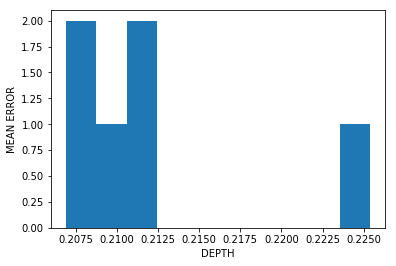

In [30]:
plt.hist(errors)
plt.xlabel("DEPTH")
plt.ylabel("MEAN ERROR")

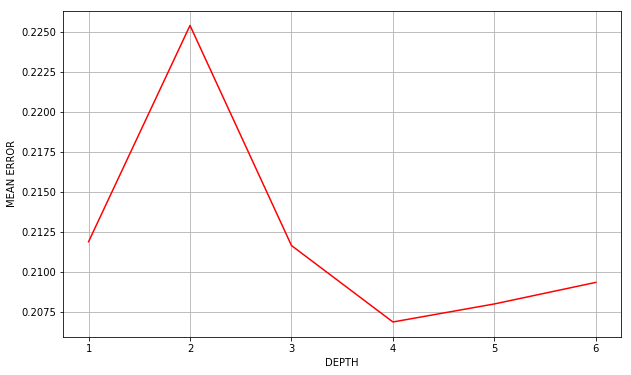

In [31]:
plt.plot((range(1,7)), errors, color='red')
plt.xlabel("DEPTH")
plt.ylabel("MEAN ERROR")
plt.grid()
plt.gcf().set_size_inches(10,6)

In [32]:
nsplits=1000
depth=4
errs=[]
for j in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN, YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("Decision Tree Depth = %d mean error = %7.6f SD = %7.6f"\
     %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 4 mean error = 0.205108 SD = 0.023296


## Random Forest

In [33]:
from sklearn import ensemble

In [34]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
clf.fit (XTRAIN, YTRAIN)
clf.score (XTEST, YTEST)

0.820627802690583

In [35]:
X2 = test.drop(['PassengerId'], axis=1).values
clf.fit (X,Y)
predictions = clf.predict(X2)

## Making a Prediction

In [36]:
submission=pd.read_csv("gender_submission.csv")

In [37]:
submission[:3]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [38]:
submission['PassengerId']=test['PassengerId']
submission['Survived']=predictions

In [40]:
submission[:5]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
